<a href="https://colab.research.google.com/github/hippyhippohops/Machine-Learning-and-Scientific-Computing-applied-to-Inverse-Scattering/blob/main/ImplementingPerceptron%26FFNNusingKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/2
51/51 [==============================] - 0s 2ms/step - loss: 0.2490
Epoch 2/2
12/12 [==============================] - 0s 2ms/step


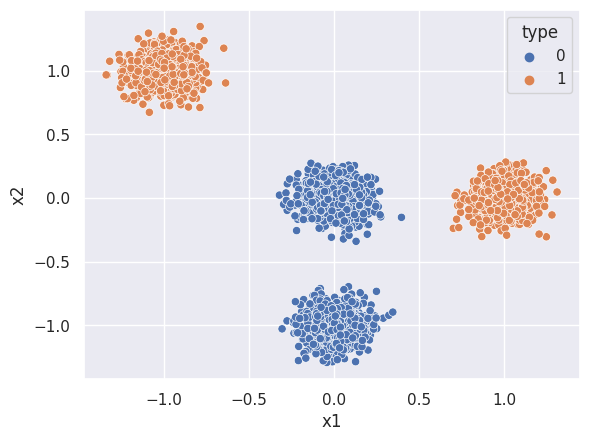

In [9]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
import keras
import tensorflow
from tensorflow.keras.optimizers import SGD
from keras.layers import Activation, Dense



def main():
  #Inintialisg random number
  np.random.seed(11) #To play with this, we can replot with random seeds

  ### Creating the dataset

  # mean and standard deviation for the x belonging to the first class
  mu_x1, sigma_x1 = 0, 0.1

  # Constat to make the second distribution different from the first
  x2_mu_diff = 0.35 #To play with this, we can replot with different 2nd distributions

  #Creating first distribution
  d1 = pd.DataFrame({'x1':np.random.normal(mu_x1,sigma_x1,1000), 'x2': np.random.normal(mu_x1, sigma_x1,1000), 'type': 0})

  #Creating the Second Distribution
  d2 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1, 1000)+x2_mu_diff, 'x2': np.random.normal(mu_x1, sigma_x1, 1000)+x2_mu_diff, 'type': 1})

  data = pd.concat([d1,d2],ignore_index=True)

  #From here, we can observe that the 2 distributions are linearly separable, so it's an appropriate task for our model
  #ax = sns.scatterplot(x="x1",y="x2", hue="type", data=data)
  #plt.show()

  #Create a training set to train the network

  #Splitting the data set in the training and test set
  msk = np.random.rand(len(data)) < 0.8

  #Roughly 80% of the data will go in the training set
  train_x, train_y = data[['x1','x2']][msk], data.type[msk]
  #Everything will go into the validation set
  test_x, test_y = data[['x1', 'x2']][~msk], data.type[~msk]

  # Now, we will use keras in order to implement a perceptron

  """
  Now that we have seen how to implement a perceptron from scratch in Python and have understood the concept, we
  can use a library to avoid re-implementing all of these algorithms. We will now use keras on top of Tensorflow to
  implement our perceptron, by introducing some simple concepts.

  The main objective of Keras is to make the model creation more Pythonic and model-centric. There are 2 ways to
  create a model, using either the:
  -> Sequential Class
  -> Model Class.
  The easiest way to create a Keras model is by using the Sequential API. Note that there are some limitations that
  come with using the Sequential API: One of it includes the fact that it is not straightforward to define models that
  may have mutliple different inputs or output sources, but this fits our purpose.
  """

  # We start by intialising the sequential class:
  my_perceptron = keras.Sequential()

  # Then, we will have to add our input layer and specify the dimensions and a few other parameters. In our case, we
  # will add a Dense layer. This just means that all of the neurons have a connection with all of the neurons from the
  # next layer. This Dense layer is fully connected, meaning that all of the neurons have one connection with the neurons
  # from the next layer. It performs the product between the input and our set of weights, which is also the kernel,
  # of course, adding the bias if specificed. Then, the result will pass through the activation function. To initialise
  # this, we need to specify the number of neurons (1), the input dimension (2, as we have 2 variables here), the activation
  # function (linear), and the initial weight value (zero). To add the layer to the model, we use the add() method, like
  # in the input/output example:
  input_layer = keras.layers.Dense(1, input_dim=2, activation="sigmoid",kernel_initializer='zero')  # FIND OUT WHAT IS Initializer??
  my_perceptron.add(input_layer)

  # Now, it is necessary to compile our model. In this phase, we will simply define the loss function and the way we want
  # to explore the gradient, our optimizer. Keras does not supply the step function that we used before, as it's not
  # differentiable and therefore will not work with back propagation. We will use the MSE instead for simplicity. Also,
  # as a gradient descent strategy, we are going to use Stochastic Gradient Descent (SGD), which is an iterative method
  # to optimize a differentiable function. When defining the SGD, we can also specify a learning rate, which we will
  # set as 0.01:
  my_perceptron.compile(loss="mse", optimizer=SGD(lr=0.01))  # Read up on Stochastic Gradient Descent

  # After this, we only need to train our network with the fit method.
  my_perceptron.fit(train_x.values, train_y, epochs=2, batch_size=32, shuffle=True)

  # Now, we can easily compute the AUC score
  pred_y = my_perceptron.predict(test_x)
  #print(roc_auc_score(test_y, pred_y))
  #Output of print is 0.9992277140335393

  """
  Epoch 1/2
  51/51 [==============================] - 1s 2ms/step - loss: 0.2490
  Epoch 2/2
  51/51 [==============================] - 0s 2ms/step - loss: 0.2470
  12/12 [==============================] - 0s 2ms/step
  0.9992277140335393
  """

  #Now, we study the keras implementation of FFNN

  #In keras, it is possible to specify the activations through either an
  #activation layer or through the activation argument supported by all forward
  #layers: so we will import Activation and Dense from keras.layers

  #We will now solve the XOR Problem with a simple FFNN. To make it more similar
  #to a real-world problem, we will add some noise to the XOR-input, and we will
  #try to predict a binary task:

  ### Creating the dataset

  # mean and standard deviation for the x belonging to the first class
  mu_x1, sigma_x1 = 0, 0.1

  # Constat to make the second distribution different from the first
  x1_mu_diff, x2_mu_diff, x3_mu_diff, x4_mu_diff = 0, 1, 0, 1

  #Creating first distribution
  d1 = pd.DataFrame({'x1':np.random.normal(mu_x1,sigma_x1,1000) + 0, 'x2': np.random.normal(mu_x1, sigma_x1,1000)+0, 'type': 0})

  #Creating the Second Distribution
  d2 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1, 1000)+1, 'x2': np.random.normal(mu_x1, sigma_x1, 1000)-0, 'type': 1})

  #Creating third distribution
  d3 = pd.DataFrame({'x1':np.random.normal(mu_x1,sigma_x1,1000)-0, 'x2': np.random.normal(mu_x1, sigma_x1,1000)-1, 'type': 0})

  #Creating the fourth Distribution
  d4 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1, 1000)-1, 'x2': np.random.normal(mu_x1, sigma_x1, 1000)+1, 'type': 1})

  data = pd.concat([d1, d2, d3, d4], ignore_index=True)
  ax = sns.scatterplot(x="x1", y="x2", hue="type", data=data)
  #Why is this different from the one given in the book???







main()





